In [1]:
# 라이브러리 설치
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# 라이브러리 로드
import pandas as pd
import numpy as np
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
# os(운영)에 따라서 설정을 변경할 때 사용할 라이브러리
import platform 

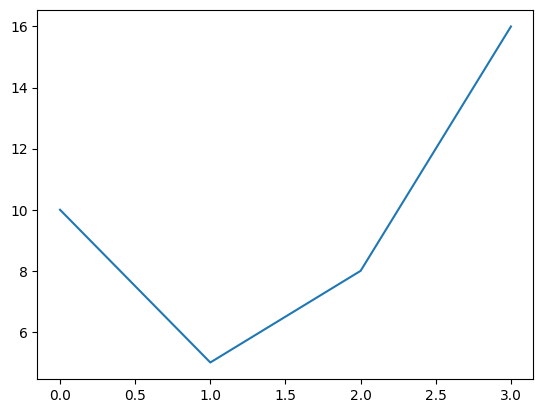

In [5]:
# matplotlib을 이용한 그래프의 시각화

# 선 그래프 (플롯 그래프)
# y축의 데이터만 존재하는 경우
y_list=[10,5,8,16]
plt.plot(y_list)
# show() 함수는 print()와 같은 기능
plt.show()

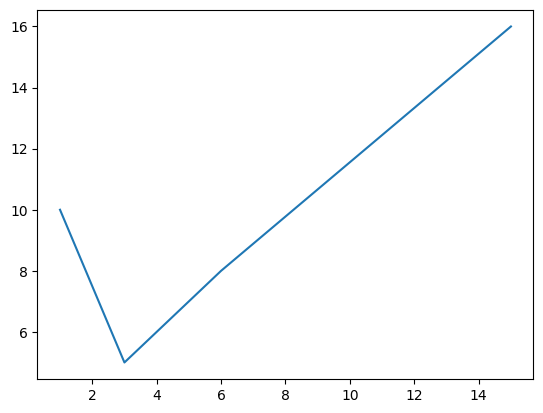

In [6]:
x_list=[1,3,6,15]
plt.plot(x_list,y_list)
plt.show()

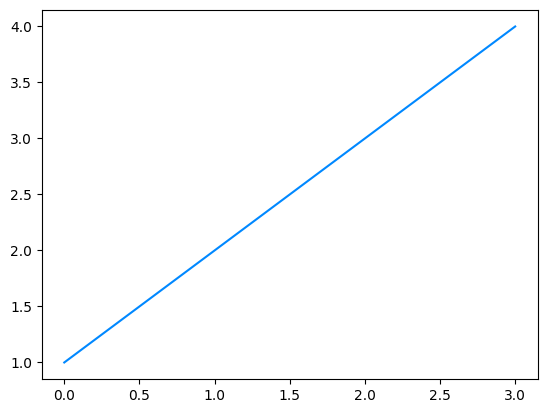

In [14]:
plt.plot([1,2,3,4], '#0088ff')
# 레드컬러, 형태 -. -> 'r-.' 
plt.show()

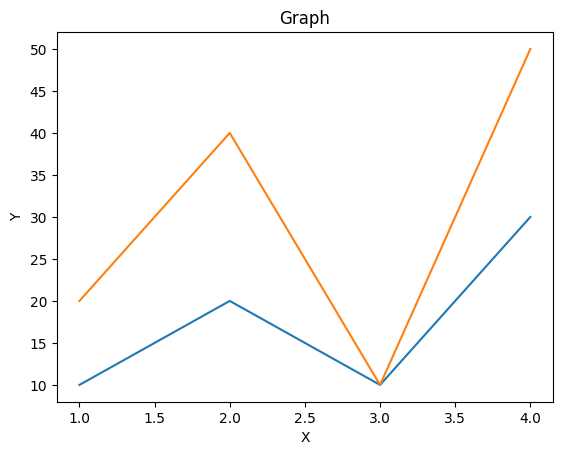

In [16]:
# x축, y축, 그래프의 이름
plt.plot([1,2,3,4],[10,20,10,30])
plt.plot([1,2,3,4],[20,40,10,50])
# x축에 이름 지정
plt.xlabel('X')
# y축에 이름 지정
plt.ylabel('Y')
# 그래프에 이름 지정
plt.title('Graph')

plt.show()

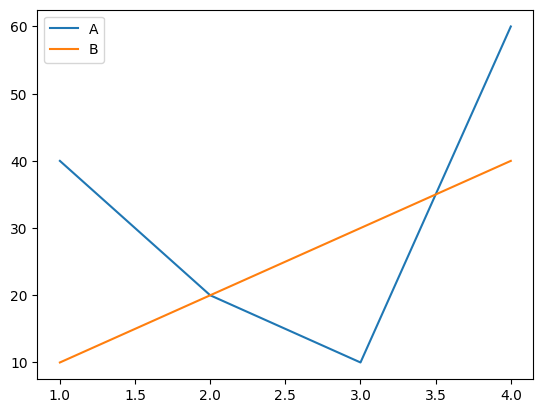

In [17]:
# 범례 추가
plt.plot([1,2,3,4],[40,20,10,60])
plt.plot([1,2,3,4],[10,20,30,40])
plt.legend(['A','B'])
plt.show()

In [19]:
# 그래프 시각화에서 한글 오류 방지
# matplot에 있는 폰트의 설정 변경
plt.rc('font',family='Malgun Gothic') 
# 윈도우 기준
# MAC의 경우 
    # if platform.system()=='Darwin':
        # plt.rc('font',family='AppleGothic')
    # else:
        # plt.rc('font',family='Malgun Gothic') -> 윈도우

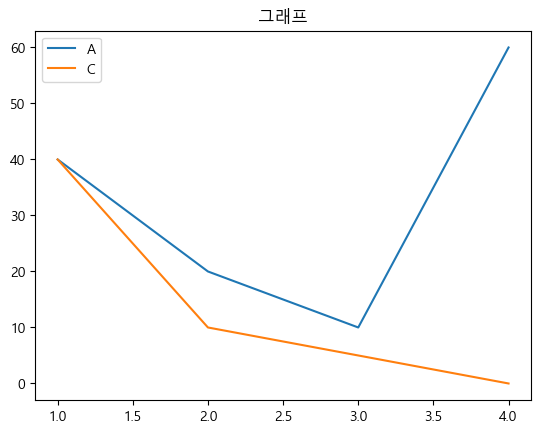

In [20]:
plt.plot([1,2,3,4],[40,20,10,60], label='A')
plt.plot([1,2,3,4],[40,10,5,0], label='C')
plt.legend()
plt.title('그래프')
plt.show()

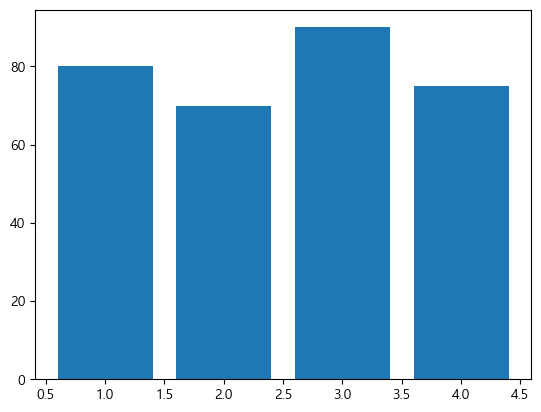

In [21]:
# 바형 그래프
x=[1,2,3,4]
y=[80,70,90,75]

plt.bar(x,y)
# plot y값만 있어도 가능, bar x,y 필수
plt.show()

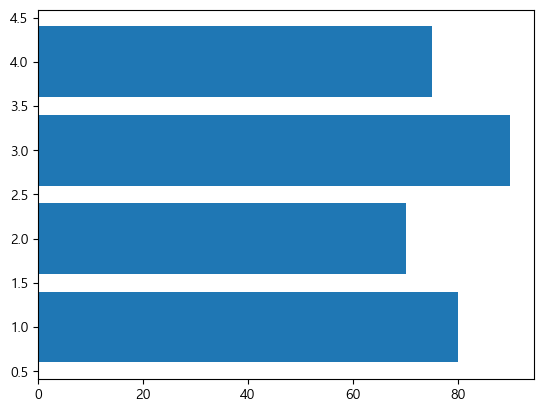

In [22]:
plt.barh(x,y)
plt.show()

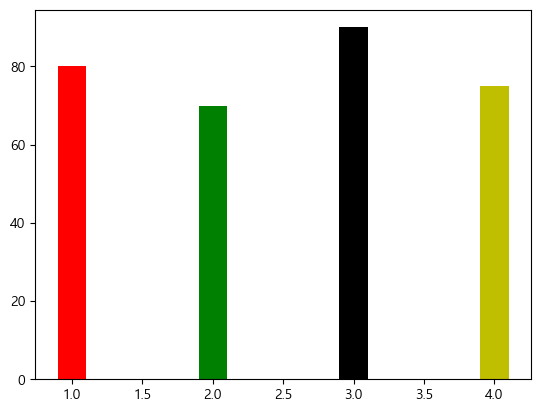

In [26]:
# 옵션 추가 (색, 너비 변경) -> 너비는 0~1 사이 값
plt.bar(x,y,color=['r','g','k','y'],width=0.2)

plt.show()

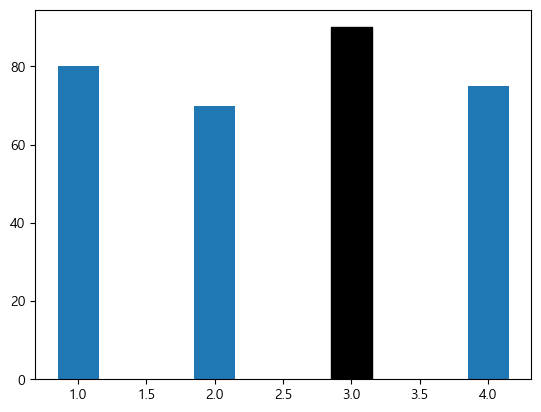

In [28]:
# 막대 그래프에서 특정 막대의 옵션 변경 (색 변경)
graph=plt.bar(x,y,width=0.3)
graph[2].set_color('k')
# 세번째 컬러를 블랙으로 변경
plt.show()

In [29]:
# 산점도 그래프 ( 데이터 분포 )
x=np.random.random(30)
y=np.random.random(30)
x
# 0부터 1까지 랜덤 데이터 생성

array([0.60060163, 0.91344819, 0.57568224, 0.4787764 , 0.1898204 ,
       0.3624733 , 0.76327792, 0.24633516, 0.2755542 , 0.95981742,
       0.64430816, 0.26307111, 0.72914854, 0.13277661, 0.3828652 ,
       0.68900383, 0.94291824, 0.17755521, 0.54811745, 0.33505331,
       0.17825397, 0.65108833, 0.22166134, 0.88454916, 0.75402233,
       0.85704256, 0.28522392, 0.21259143, 0.85119408, 0.63310844])

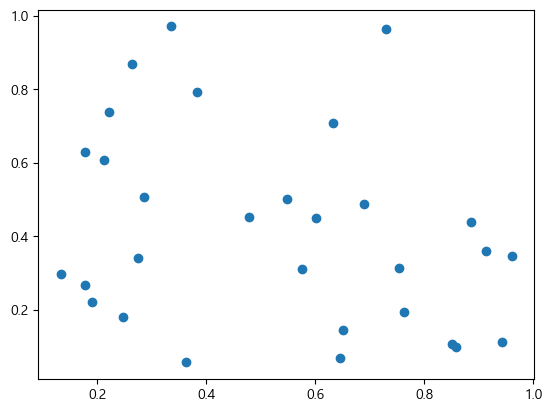

In [30]:
plt.scatter(x,y)

plt.show()

In [31]:
# 샘플 데이터
df = pd.read_csv('../csv/drinks.csv')

In [33]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [34]:
# 맥주 소비량, 위스키 소비량, 와인 소비량, 순수 알콜 양의 상관관계 확인
# 피어슨 상관계수
    # -1: 반비례. 하나의 데이터가 오르면 하나의 데이터가 내려간다.
    # 1: 비례. 하나의 데이터가 오르면 하나의 데이터가 같이 오른다. 
    # 0: 무관. 두개의 데이터가 무작위 형태이다.
    
cols=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr=df[cols].corr('pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


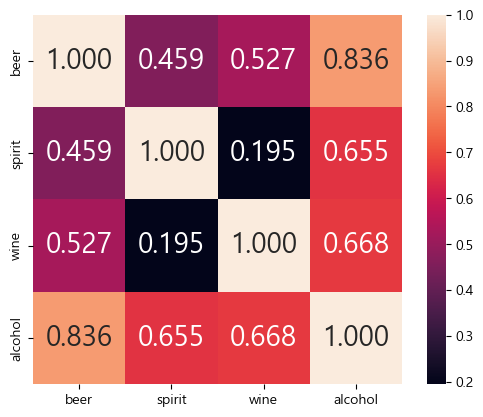

In [35]:
# seaborn 라이브러리를 이용하여 히트맵 시각화
cols_name = ['beer','spirit','wine','alcohol']

hm=sns.heatmap(
    corr.values,
    cbar=True, #사이드바 유무
    annot=True, #히트맵의 수치 표현 유무
    square=True, #정사각형 표시
    fmt='0.3f', #수치의 소수점 자리수
    annot_kws={'size':20}, #수치의 크기
    xticklabels=cols_name,
    yticklabels=cols_name
)

plt.show()

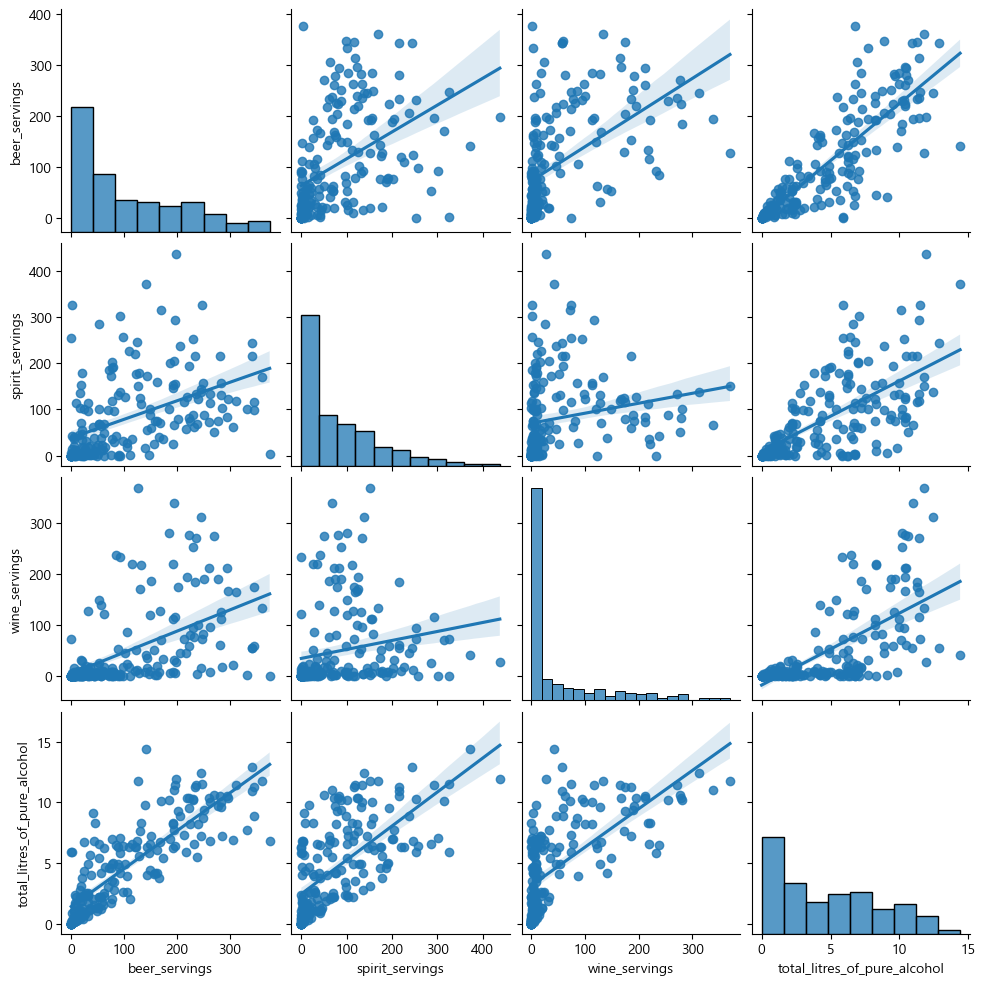

In [39]:
sns.pairplot(
    df[cols],
    height=2.5,
    kind='reg'
)
plt.show()